In [1]:
import math

# Function and exact derivative
def f(x):
    return math.exp(x) * math.sin(x)

def f_prime(x):
    return math.exp(x) * (math.sin(x) + math.cos(x))

def forward_diff(f, x0, h): 
    return (-3*f(x0) + 4*f(x0 + h) - f(x0 + 2*h)) / (2*h) 
def backward_diff(f, x0, h): 
    return (3*f(x0) - 4*f(x0 - h) + f(x0 - 2*h)) / (2*h) 
def central_diff(f, x0, h): 
    return (-f(x0 + 2*h) + 8*f(x0 + h) - 8*f(x0 - h) + f(x0 - 2*h)) / (12*h)

# Step sizes
h_values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-7]

# Point of evaluation
x0 = math.pi / 4

# Compute derivative approximations
fwd_vals = [forward_diff(f, x0, h) for h in h_values]
bwd_vals = [backward_diff(f, x0, h) for h in h_values]
ctr_vals = [central_diff(f, x0, h) for h in h_values]

# Exact derivative
f_exact = f_prime(x0)

# Print table
print(f"{'h':>10} | {'Forward':>15} | {'Backward':>15} | {'Central 5-pt':>15}")
print("-"*62)
for h, fwd, bwd, ctr in zip(h_values, fwd_vals, bwd_vals, ctr_vals):
    print(f"{h:10.1e} | {fwd:15.8f} | {bwd:15.8f} | {ctr:15.8f}")

print(f"\nExact derivative f'({x0:.4f}) = {f_exact:.8f}")

# Compute absolute errors
error_fwd = [abs(fwd - f_exact) for fwd in fwd_vals]
error_bwd = [abs(bwd - f_exact) for bwd in bwd_vals]
error_ctr = [abs(ctr - f_exact) for ctr in ctr_vals]

# Print table of absolute errors
print(f"{'h':>10} | {'Forward Error':>15} | {'Backward Error':>15} | {'Central 5-pt Error':>20}")
print("-"*70)
for h, ef, eb, ec in zip(h_values, error_fwd, error_bwd, error_ctr):
    print(f"{h:10.1e} | {ef:15.8e} | {eb:15.8e} | {ec:20.8e}")

         h |         Forward |        Backward |    Central 5-pt
--------------------------------------------------------------
   1.0e-01 |      3.10346719 |      3.10035510 |      3.10180775
   1.0e-02 |      3.10176796 |      3.10176486 |      3.10176640
   1.0e-03 |      3.10176640 |      3.10176639 |      3.10176639
   1.0e-04 |      3.10176639 |      3.10176639 |      3.10176639
   1.0e-05 |      3.10176639 |      3.10176639 |      3.10176639
   1.0e-07 |      3.10176639 |      3.10176639 |      3.10176639

Exact derivative f'(0.7854) = 3.10176639
         h |   Forward Error |  Backward Error |   Central 5-pt Error
----------------------------------------------------------------------
   1.0e-01 |  1.70079380e-03 |  1.41129630e-03 |       4.13567704e-05
   1.0e-02 |  1.56540982e-06 |  1.53645996e-06 |       4.13570822e-09
   1.0e-03 |  1.55201008e-09 |  1.54961999e-09 |       3.43725048e-13
   1.0e-04 |  3.24895666e-12 |  2.13873363e-12 |       2.13828955e-12
   1.0e-05 |  7.113

# Error Plots

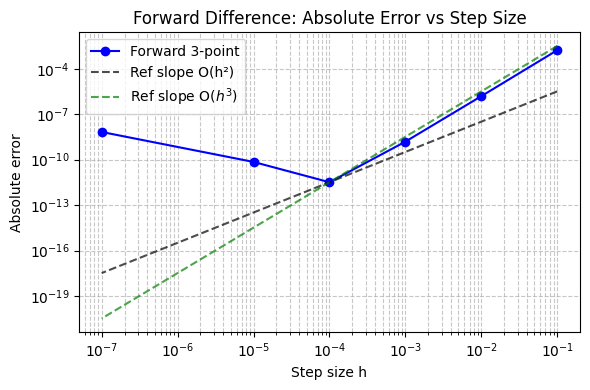

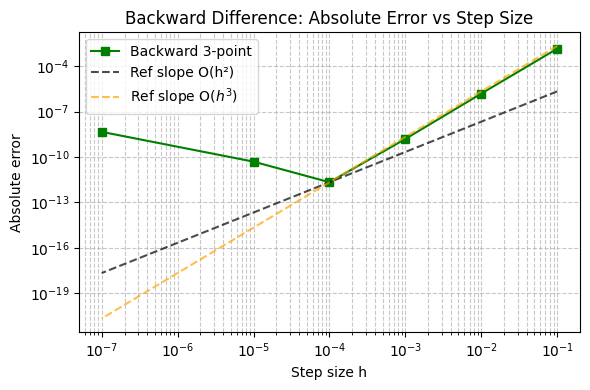

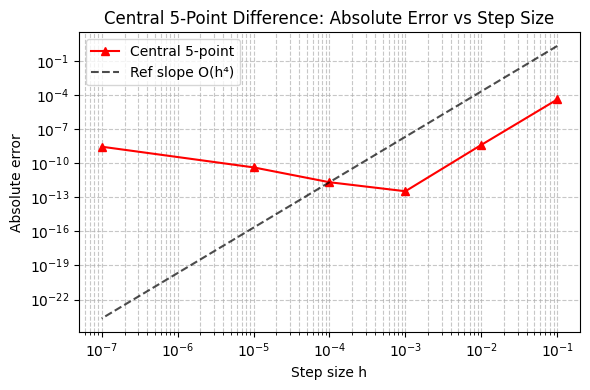

Forward difference: best h = 0.0001, min error = 3.249e-12
Backward difference: best h = 0.0001, min error = 2.139e-12
Central 5-point: best h = 0.001, min error = 3.437e-13


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Compute absolute errors
h_values = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.0000001]
error_fwd = [abs(val - f_exact) for val in fwd_vals]
error_bwd = [abs(val - f_exact) for val in bwd_vals]
error_ctr = [abs(val - f_exact) for val in ctr_vals]

# Helper: add reference line
def add_reference_line(x, y, slope, label, color):
    x_ref = x[len(x)//2]
    y_ref = y[len(y)//2]
    c = y_ref / (x_ref**slope)
    ref_line = [c * (xi**slope) for xi in x]
    plt.loglog(x, ref_line, '--', color=color, label=label, alpha=0.7)

# --- Forward difference plot ---
plt.figure(figsize=(6,4))
plt.loglog(h_values, error_fwd, 'o-', color='blue', label='Forward 3-point')
add_reference_line(h_values, error_fwd, 2, 'Ref slope O(h²)', 'black')
add_reference_line(h_values, error_fwd, 3, 'Ref slope O($h^3$)', 'green')  # Added line
plt.xlabel('Step size h')
plt.ylabel('Absolute error')
plt.title('Forward Difference: Absolute Error vs Step Size')
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# --- Backward difference plot ---
plt.figure(figsize=(6,4))
plt.loglog(h_values, error_bwd, 's-', color='green', label='Backward 3-point')
add_reference_line(h_values, error_bwd, 2, 'Ref slope O(h²)', 'black')
add_reference_line(h_values, error_bwd, 3, 'Ref slope O($h^3$)', 'orange')  # Added line
plt.xlabel('Step size h')
plt.ylabel('Absolute error')
plt.title('Backward Difference: Absolute Error vs Step Size')
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# --- Central difference plot ---
plt.figure(figsize=(6,4))
plt.loglog(h_values, error_ctr, '^-', color='red', label='Central 5-point')
add_reference_line(h_values, error_ctr, 4, 'Ref slope O(h⁴)', 'black')
plt.xlabel('Step size h')
plt.ylabel('Absolute error')
plt.title('Central 5-Point Difference: Absolute Error vs Step Size')
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

